In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import plotly.graph_objects as go
import os
import requests
import json
import plotly.express as px
from config import api_key
from config import mapbox_token


# Data pulled from U.S. Fish & Wildlife Service
# https://ecos.fws.gov/ecp/report/species-listings-by-tax-group?statusCategory=Listed&groupName=Birds
endangered_bird_data_to_load = "Resources/endangered_birds.csv"

endangered_birds_data = pd.read_csv(endangered_bird_data_to_load)

In [3]:
endangered_df = endangered_birds_data
endangered_df.head(2)

,Scientific Name,Common Name,Where Listed,Region,ESA Listing Status
0,Akialoa stejnegeri,Kauai akialoa (honeycreeper),Wherever found,1,Endangered
1,Hemignathus wilsoni,akiapolaau,Wherever found,1,Endangered


In [4]:
{c: i for i, c in enumerate(endangered_df.columns)}
print({c: i for i, c in enumerate(endangered_df.columns)})

{'Scientific Name': 0, 'Common Name': 1, 'Where Listed': 2, 'Region  ': 3, 'ESA Listing Status  ': 4}


In [5]:
endangered_df["Region  "].value_counts()

1    50
4    22
2    12
8    10
7     4
5     3
6     1
3     1
Name: Region  , dtype: int64

In [6]:
# Texas falls in Region 2
region_2_df = endangered_df.loc[endangered_df["Region  "] == 2]
region_2_df.head(2)

,Scientific Name,Common Name,Where Listed,Region,ESA Listing Status
3,Grus americana,Whooping crane,"Wherever found, except where listed as an expe...",2,Endangered
19,Tympanuchus cupido attwateri,Attwater's greater prairie-chicken,Wherever found,2,Endangered


In [7]:
regionCode = "US"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/recent"

r = requests.get(url, params={"key": api_key, "back": 7})

In [8]:
r.url

'https://api.ebird.org/v2/data/obs/US/recent?key=d56mdhi9b35r&back=7'

In [9]:
r.status_code

200

In [10]:
data = r.json()

In [11]:
df = pd.DataFrame(data)
df.head(2)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,clarai11,Clapper Rail,Rallus crepitans,L784728,Ocean Isle Beach,2020-09-24 11:57,1.0,33.891413,-78.42762,True,False,False,S73998067
1,botgra,Boat-tailed Grackle,Quiscalus major,L784728,Ocean Isle Beach,2020-09-24 11:57,1.0,33.891413,-78.42762,True,False,False,S73998067


sciname_list = df["sciName"].to_list()
sciname_list

scientific_name_list = endangered_df["Scientific Name"].to_list()
scientific_name_list

sci_name_df = pd.DataFrame(
    list(zip(scientific_name_list, sciname_list)),
    columns=["Scientific Name", "sciName"],
)
sci_name_df

In [12]:
endangered_df.head(2)

,Scientific Name,Common Name,Where Listed,Region,ESA Listing Status
0,Akialoa stejnegeri,Kauai akialoa (honeycreeper),Wherever found,1,Endangered
1,Hemignathus wilsoni,akiapolaau,Wherever found,1,Endangered


In [13]:
endangereddf_df = endangered_df.merge(df, left_on="Scientific Name", right_on="sciName")
endangereddf_df

,Scientific Name,Common Name,Where Listed,Region,ESA Listing Status,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,Gymnogyps californianus,California condor,"U.S.A. only, except where listed as an experim...",8,Endangered,calcon,California Condor,Gymnogyps californianus,L821559,Glen Canyon NRA--Navajo Bridge,2020-09-23 09:09,1.0,36.817170,-111.630149,True,False,False,S73966409
1,Gymnogyps californianus,California condor,"U.S.A. (specific portions of Arizona, Nevada, ...",8,"Experimental Population, Non-Essential",calcon,California Condor,Gymnogyps californianus,L821559,Glen Canyon NRA--Navajo Bridge,2020-09-23 09:09,1.0,36.817170,-111.630149,True,False,False,S73966409
2,Grus americana,Whooping crane,"Wherever found, except where listed as an expe...",2,Endangered,whocra,Whooping Crane,Grus americana,L12346859,Dee Bennett Rd,2020-09-22 10:50,1.0,41.327366,-88.968151,True,True,True,S73934482
3,Grus americana,Whooping crane,"U.S.A. (CO, ID, FL, NM, UT, and the western ha...",4,"Experimental Population, Non-Essential",whocra,Whooping Crane,Grus americana,L12346859,Dee Bennett Rd,2020-09-22 10:50,1.0,41.327366,-88.968151,True,True,True,S73934482
4,Grus americana,Whooping crane,"U.S.A. (AL, AR, CO, FL, GA, ID, IL, IN, IA, KY...",2,"Experimental Population, Non-Essential",whocra,Whooping Crane,Grus americana,L12346859,Dee Bennett Rd,2020-09-22 10:50,1.0,41.327366,-88.968151,True,True,True,S73934482
5,Grus americana,Whooping crane,U.S.A (Southwestern Louisiana),4,"Experimental Population, Non-Essential",whocra,Whooping Crane,Grus americana,L12346859,Dee Bennett Rd,2020-09-22 10:50,1.0,41.327366,-88.968151,True,True,True,S73934482
6,Anas wyvilliana,Hawaiian (=koloa) Duck,Wherever found,1,Endangered,hawduc,Hawaiian Duck,Anas wyvilliana,L469355,Kawaiele State Waterbird Sanctuary,2020-09-22 08:33,2.0,22.009979,-159.767953,True,False,False,S73932039
7,Pterodroma sandwichensis,Hawaiian petrel,Wherever found,1,Endangered,hawpet1,Hawaiian Petrel,Pterodroma sandwichensis,L7991696,Glass Beach Cliff Seawatch,2020-09-23 18:47,1.0,21.896600,-159.582836,True,False,True,S73986187
8,Mycteria americana,Wood stork,"AL, FL, GA, MS, NC, SC",4,Threatened,woosto,Wood Stork,Mycteria americana,L12356920,"4410 Southeast 14th Terrace, Gainesville, Flor...",2020-09-24 11:25,1.0,29.611797,-82.308514,True,False,True,S73997303
9,Charadrius melodus,Piping Plover,"[Great Lakes watershed DPS] - Great Lakes, wat...",3,Endangered,pipplo,Piping Plover,Charadrius melodus,L197073,Stone Harbor Point,2020-09-24 10:30,3.0,39.027076,-74.777629,True,False,False,S73995402


In [14]:
# Setting MapBox token.
px.set_mapbox_access_token(mapbox_token)

In [26]:
# Generating scatter map.
fig = px.scatter_mapbox(
    endangereddf_df,
    lat="lat",
    lon="lng",
    color="howMany",
    hover_data=["Common Name", "Scientific Name", "Where Listed", "locName"],
)

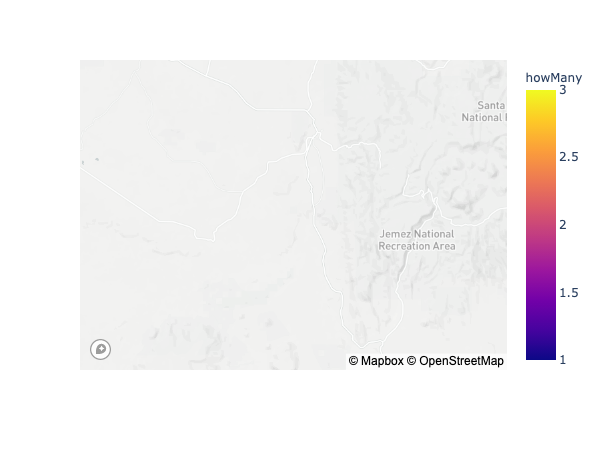

In [27]:
fig.show()

In [65]:
regionCode = "US-CA"
year = "2020"
month = "6"
day = "18"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}"

r = requests.get(url, params={"key": api_key, "species": "California condor"})

In [66]:
r.url

'https://api.ebird.org/v2/data/obs/US-CA/historic/2020/6/18?key=d56mdhi9b35r&species=California+condor'

In [67]:
r.status_code

200

In [68]:
data = r.json()

In [69]:
data

[{'speciesCode': 'brnowl',
  'comName': 'Barn Owl',
  'sciName': 'Tyto alba',
  'locId': 'L2066430',
  'locName': 'Sweetland Neighborhood',
  'obsDt': '2020-06-18 23:20',
  'howMany': 1,
  'lat': 34.1019973,
  'lng': -117.733655,
  'obsValid': True,
  'obsReviewed': False,
  'locationPrivate': True,
  'subId': 'S70593909'},
 {'speciesCode': 'wesowl1',
  'comName': 'Western Screech-Owl',
  'sciName': 'Megascops kennicottii',
  'locId': 'L2609605',
  'locName': 'Valley Drive, Kelseyville',
  'obsDt': '2020-06-18 23:20',
  'howMany': 1,
  'lat': 38.9734731,
  'lng': -122.827583,
  'obsValid': True,
  'obsReviewed': False,
  'locationPrivate': True,
  'subId': 'S70675756'},
 {'speciesCode': 'belkin1',
  'comName': 'Belted Kingfisher',
  'sciName': 'Megaceryle alcyon',
  'locId': 'L1080782',
  'locName': 'Spanish Creek and Greenhorn Creek confluence',
  'obsDt': '2020-06-18 22:32',
  'howMany': 1,
  'lat': 39.9682403,
  'lng': -120.9153557,
  'obsValid': True,
  'obsReviewed': False,
  'loc

In [ ]:
states = [
    ["Washington", 1],
    ["Oregon", 1],
    ["Idaho", 1],
    ["Hawaii", 1],
    ["Montana", 6],
    ["Wyoming", 6],
    ["Utah", 6],
    ["Colorado", 6],
    ["North Dakota", 6],
    ["South Dakota", 6],
    ["Nebraska", 6],
    ["Kansas", 6],
    ["Minnesota", 3],
    ["Iowa", 3],
    ["Missouri", 3],
    ["Wisconsin", 3],
    ["Illinois", 3],
    ["Indian", 3],
    ["Michigan", 3],
    ["Ohio", 3],
    ["Virginia", 5],
    ["West Virginia", 5],
    ["Maryland", 5],
    ["Delaware", 5],
    ["Pennsylvania", 5],
    ["New York", 5],
    ["New Jersey", 5],
    ["Connecticut", 5],
    ["Rhode Island", 5],
    ["Massachusetts", 5],
    ["Vermont", 5],
    ["New Hampshire", 5],
    ["Maine", 5],
    ["Florida", 4],
    ["Georgia", 4],
    ["South Carolina", 4],
    ["North Carolina", 4],
    ["Alabama", 4],
    ["Mississippi", 4],
    ["Louisianna", 4],
    ["Arkansas", 4],
    ["Tennessee", 4],
    ["Texas", 2],
    ["Oklahoma", 2],
    ["New Mexico", 2],
    ["Arizona", 2],
    ["Alaska", 7],
    ["California", 7],
    ["Nevada", 7],
    ["Kentuck", 7],
]
states_df = pd.DataFrame(states, columns=["State", "Region"])

In [ ]:
states_df.value_counts().sum()

In [ ]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=True,
    resolution=50,
    scope="usa",
    showcountries=True,
    countrycolor="Black",
    showsubunits=True,
    subunitcolor="Blue",
)
fig.update_layout(height=300, margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [ ]:
# Historic Observations
regionCode = "US"
y = "1812"
m = "June"
d = "18"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{y}/{m}/{d}"

r = requests.get(url, params={"key": api_key})

In [ ]:
r.url

In [ ]:
r.status_code